## import relevant libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## read the dataset

In [3]:
gold: pd.DataFrame = pd.read_csv('Data/gld_price_data.csv')

In [4]:
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [9]:
gold.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
gold.shape

(2290, 6)

In [5]:
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
gold['Date'] = pd.to_datetime(gold.Date)

In [12]:
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


Date
2008-01-31    AxesSubplot(0.125,0.125;0.775x0.755)
2008-02-29    AxesSubplot(0.125,0.125;0.775x0.755)
2008-03-31    AxesSubplot(0.125,0.125;0.775x0.755)
2008-04-30    AxesSubplot(0.125,0.125;0.775x0.755)
2008-05-31    AxesSubplot(0.125,0.125;0.775x0.755)
                              ...                 
2018-01-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-02-28    AxesSubplot(0.125,0.125;0.775x0.755)
2018-03-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-04-30    AxesSubplot(0.125,0.125;0.775x0.755)
2018-05-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: M, Name: SPX, Length: 125, dtype: object

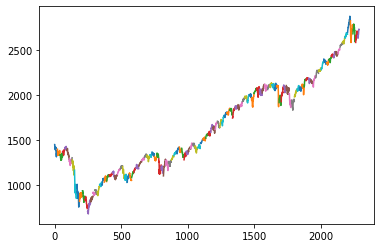

In [17]:
gold.groupby(pd.Grouper(key='Date', freq='M'))['SPX'].plot()

In [18]:
correlation = gold.corr()

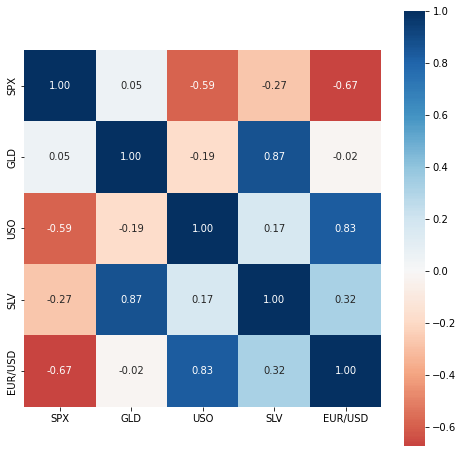

In [27]:
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, center=0, square=True, annot=True, cmap='RdBu', fmt='0.2f');

<AxesSubplot:ylabel='Frequency'>

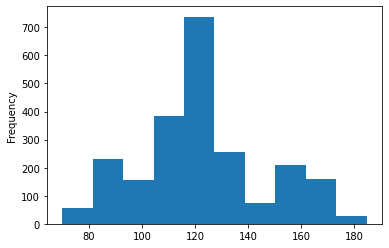

In [31]:
gold.GLD.plot(kind='hist')

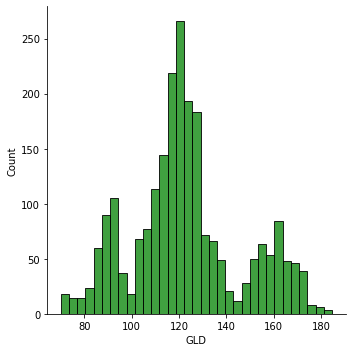

In [37]:
sns.displot(gold['GLD'], color='green');

In [40]:
X: pd.DataFrame = gold.drop(['Date', 'GLD'], axis='columns')
y: pd.Series = gold.GLD

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [42]:
scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')
scores = -scores
scores.mean()

194.39979459646506

In [43]:
scores = cross_val_score(Lasso(), X, y, cv=5, scoring='neg_mean_squared_error')
scores = -scores
scores.mean()

184.56020674263806

In [44]:
scores = cross_val_score(Ridge(), X, y, cv=5, scoring='neg_mean_squared_error')
scores = -scores
scores.mean()

191.38445897632374

In [47]:
scores = cross_val_score(DecisionTreeRegressor(), X, y, cv=5, scoring='neg_mean_squared_error')
scores = -scores
scores.mean()

142.7883998294613